In [39]:

import kagglehub
shreyapmaher_fruits_dataset_images_path = kagglehub.dataset_download('shreyapmaher/fruits-dataset-images')

print('Data source import complete.')


Data source import complete.


In [40]:
!pip install tensorflow keras numpy matplotlib scikit-learn opencv-python pandas seaborn pillow


In [43]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from PIL import Image

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# <p style="background-color: #38A3A5; font-family: Georgia, serif; font-size: 28px; text-align: center; color: #FFF; padding: 10px; border-radius: 20px; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">Load the Training & Validation Data</p>


In [53]:
dataset_path = '/kaggle/input/fruits-dataset-images/images'

batch_size = 32
img_height = 224
img_width = 224

train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    directory=dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    directory=dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 288 images belonging to 9 classes.
Found 71 images belonging to 9 classes.


# <p style="background-color: #38A3A5; font-family: Georgia, serif; font-size: 28px; text-align: center; color: #FFF; padding: 10px; border-radius: 20px; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">Lets Display the Information about Dataset</p>


In [55]:

print("Dataset Information:")
print(f'Training samples: {train_generator.samples}')
print(f'Validation samples: {validation_generator.samples}')
print(f'Class indices: {train_generator.class_indices}')


Dataset Information:
Training samples: 288
Validation samples: 71
Class indices: {'apple fruit': 0, 'banana fruit': 1, 'cherry fruit': 2, 'chickoo fruit': 3, 'grapes fruit': 4, 'kiwi fruit': 5, 'mango fruit': 6, 'orange fruit': 7, 'strawberry fruit': 8}


# <p style="background-color: #38A3A5; font-family: Georgia, serif; font-size: 28px; text-align: center; color: #FFF; padding: 10px; border-radius: 20px; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">Lets Display Images of Data with Labels</p>


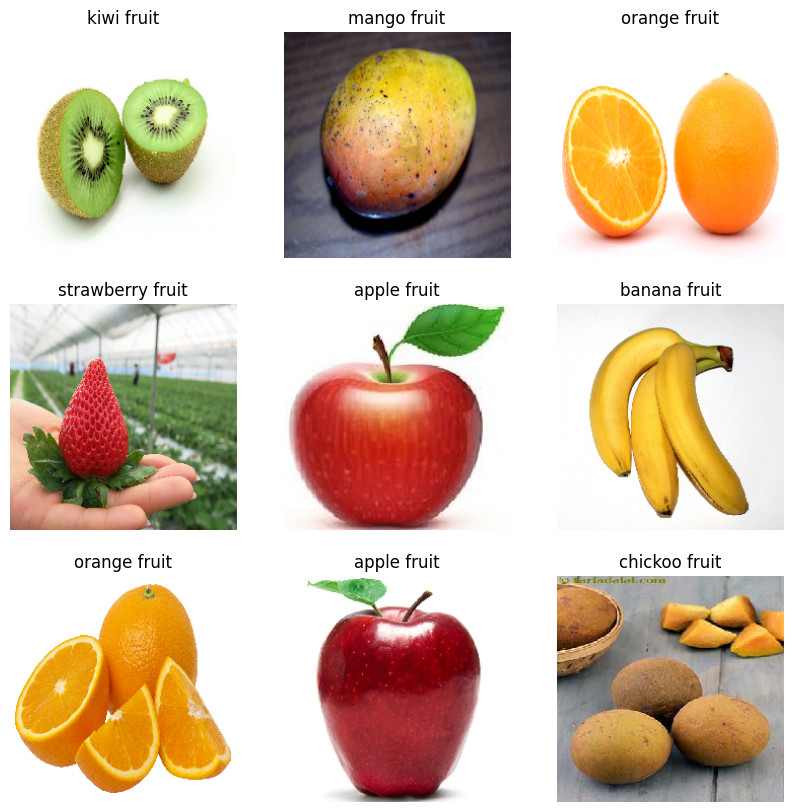

In [56]:
def get_class_label(one_hot_encoded_label):
    class_index = np.argmax(one_hot_encoded_label)
    class_label = list(train_generator.class_indices.keys())[class_index]
    return class_label

batch_images, batch_labels = next(train_generator)

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(batch_images[i])
    label = get_class_label(batch_labels[i])
    plt.title(label)
    plt.axis("off")
plt.show()


# <p style="background-color: #38A3A5; font-family: Georgia, serif; font-size: 28px; text-align: center; color: #FFF; padding: 10px; border-radius: 20px; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">Lets have a sneakpeak at numclasses</p>


In [57]:
# Define the number of classes
num_classes = len(train_generator.class_indices)
num_classes

9

# <p style="background-color: #38A3A5; font-family: Georgia, serif; font-size: 28px; text-align: center; color: #FFF; padding: 10px; border-radius: 20px; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">Lets Load and FineTune the InceptionV3 Model for Fruit Classification</p>


In [58]:
from tensorflow.keras.callbacks import EarlyStopping

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers[:-20]:
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(train_generator, epochs=10, validation_data=validation_generator, callbacks=[early_stopping])



Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 83s 8s/step - accuracy: 0.2498 - loss: 2.1382 - val_accuracy: 0.8169 - val_loss: 0.9790
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 64s 7s/step - accuracy: 0.7561 - loss: 1.0920 - val_accuracy: 0.8732 - val_loss: 0.6084
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 54s 6s/step - accuracy: 0.8546 - loss: 0.6505 - val_accuracy: 0.9155 - val_loss: 0.4217
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 54s 6s/step - accuracy: 0.9395 - loss: 0.3676 - val_accuracy: 0.9155 - val_loss: 0.3532
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 54s 6s/step - accuracy: 0.9289 - loss: 0.3242 - val_accuracy: 0.9155 - val_loss: 0.3210
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 64s 7s/step - accuracy: 0.9640 - loss: 0.2178 - val_accuracy: 0.9155 - val_loss: 0.2790
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 54s 6s/step - accuracy: 0.9802 - loss: 0.1581 - val_accuracy: 0.9155 - val_loss: 0.2510
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 54s 6s/step - accuracy: 0.9855 - loss: 0.1234 - val_accuracy: 0.9155 - val_loss: 0.2439
Epoch 9/

# <p style="background-color: #38A3A5; font-family: Georgia, serif; font-size: 28px; text-align: center; color: #FFF; padding: 10px; border-radius: 20px; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">Lets visualize the Training & Validation Accuracy & Loss</p>


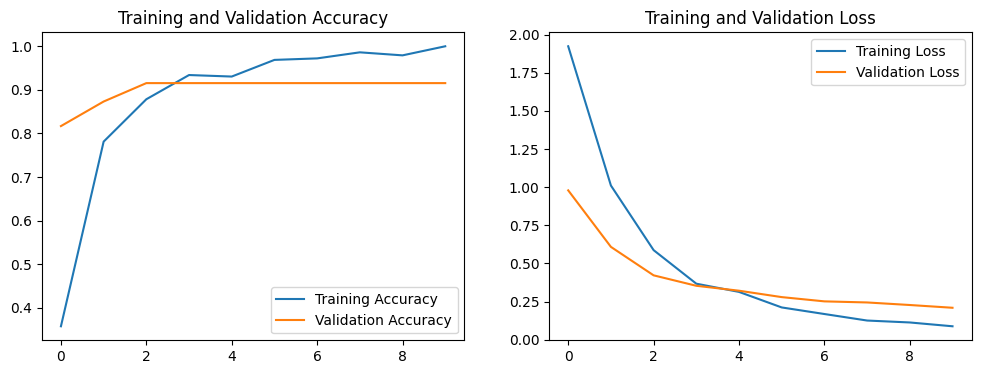

In [59]:

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()


In [60]:
model.save('my_model.keras')

In [61]:
from google.colab import files
files.download("my_model.keras")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<div style="margin: 0 auto; max-width: 600px;">
    <div style="background-image: url('https://cdn.pixabay.com/animation/2023/07/11/02/33/02-33-13-409_512.gif');
                background-size: cover;
                padding: 50px;
                font-family: Verdana, sans-serif; /* Changed font family */
                border: 4px solid #fff;
                border-radius: 20px;
                color: #7469B6; /* Text color */
                text-align: center;
                box-shadow: 0px 8px 15px rgba(0, 0, 0, 0.4);
                animation: fadeIn 2s ease-in-out;
                height: 400px;"> <!-- Adjusted height -->
        <h1 style="font-weight: bold; color: #fff;"></h1>
        <style>
            @keyframes fadeIn {
                from {
                    opacity: 0;
                }
                to {
                    opacity: 1;
                }
            }
            h1 {
                margin-top: 0;
                font-size: 48px;
                text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.6);
            }
        </style>
    </div>
</div>
